# <center> Description of My Corpora </center>


<center> <img src="images/liberals_cons_heads.png" width="400" height="400"> </center>

* Below, I will do some exploratory analysis on my liberal and conservative corpora to briefly outline the data I am working with in this project

* I pulled down timelines of 170 liberal account sand 125 conservative accounts from Twitter between March 1st, 2020  and March 31st, 2021 using snscrape. I had 1 million liberal tweets and nearly 500,000 conservative tweets. To make my corpora easier to manage I randomly sampled 10,000 tweets per corpora to work with. 

* The accounts were taken from a list created by political scientist Pablo Barera in his 2015 paper, *Birds of the Same Feather Tweet Together*, a statistical analysis describing how an individual's followers list can accurately predict their political ideology  

* After displaying the usernames through bar graphs and word clouds, and showing the distribution of tweets over the course of the year for both corpora, I will determine which days there are significantly more liberal or more conservative tweets. I will use these big differences between the corpora to convey a story regarding polarization.

* I will locate the days with the biggest differences between tweets, consider those my "polarization" days, and subset the data sets so I can look into what is the difference between the tweets and why there is a great difference.

In [26]:
## Load in necessary packages
import pandas as pd
import random as random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
## Load in dataframes
con_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/con_final_data.csv")
lib_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/liberal_data_final.csv")

In [4]:
## How many tweets am I working with?
print("I am working with", len(con_data), "conservative tweets")
print("I am working with", len(lib_data), "liberal tweets")

I am working with 10000 conservative tweets
I am working with 10000 liberal tweets


In [5]:
## Creating date-time data, using pd.to_datetime
con_data["created_at"]=pd.to_datetime(con_data["created_at"])
lib_data["created_at"]=pd.to_datetime(lib_data["created_at"])

## create two data frames which are the tweet sums by day
con_data_2=pd.DataFrame(con_data.groupby("created_at").text.count())
lib_data_2=pd.DataFrame(lib_data.groupby("created_at").text.count())

## <center> Word Clouds </center>

* Below I have created two word clouds, one for each corpora to depict the different users I have tweets from

* Acknowledging that word clouds are not the optimal form to describe data, I decided to use them here just to give the readers the ability to glance over and quickly get a sense of some of the recognizable names in each corpora.

* Below, I will be depicting the users in the corpora in a more streamlined manner, through graphs.

In [27]:
## creating the word clouds
users=lib_data['username'].dropna().tolist()
for word in users:
    if word== float:
        del word 
liberal_users= " "
liberal_users += " ".join(users)+" "

users_con=con_data['username'].dropna().tolist()
conserv_users= " "
conserv_users += " ".join(users_con)+" "

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(230,400%%, %d%%)" % random.randint(60, 100)

wordcloud = WordCloud(width = 800, height = 800,
                background_color="white",
                collocations=False,
                min_font_size = 10).generate(liberal_users)
wordcloud.recolor(color_func = blue_color_func)

def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(350,400%%, %d%%)" % random.randint(60, 100)
wordcloud_2 = WordCloud(width = 800, height = 800,
                background_color="white",
                collocations=False,
                min_font_size = 10).generate(conserv_users)
wordcloud_2.recolor(color_func = red_color_func)

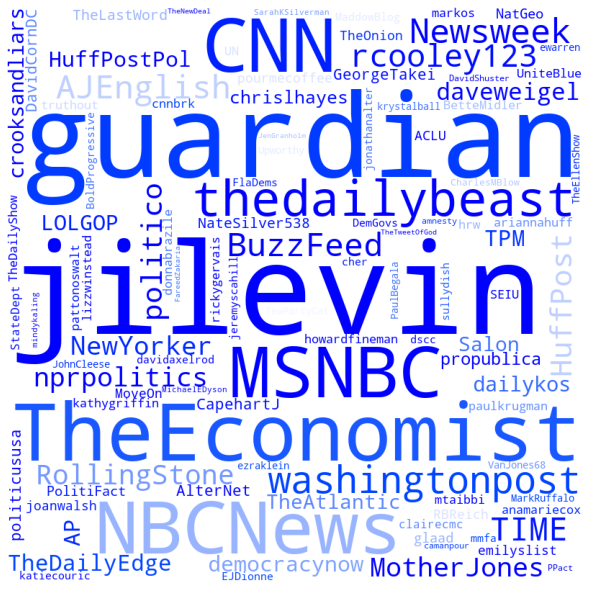

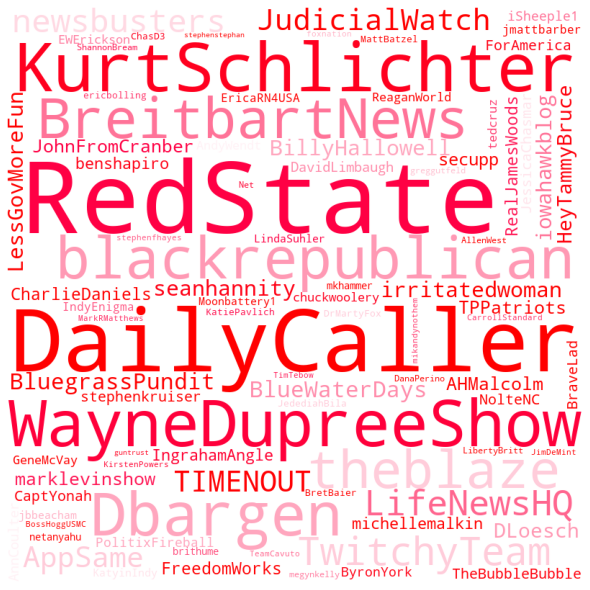

In [7]:
## plotting the word clouds
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_2)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### <center> Word Clouds: Observations </center>

* The word clouds help to describe the corpora 
* NBC News, Buzzfeed, Politico, NPR politics are some examples of the prevalent users in the liberal corpus 
    * Interestingly, the liberal corpus has a lot of users that are political/news users
    
* Red State, Daily Caller, Sean Hannity are some examples of the prevalent users in the conservative corpus
    * In this corpus, news sources are distinctively less prominent than the liberal corpus



## <center> Top 10 Users </center>

* To expand a bit more on the word clouds, below I have created two bar graphs, which depict who are the top 10 users in each corpora

In [8]:
## finding Top 10 conservative users
con_users=pd.DataFrame(con_data.groupby('username').text.count())
top_10=con_users.sort_values('text', ascending=False)[0:11]
top_10=top_10.reset_index()

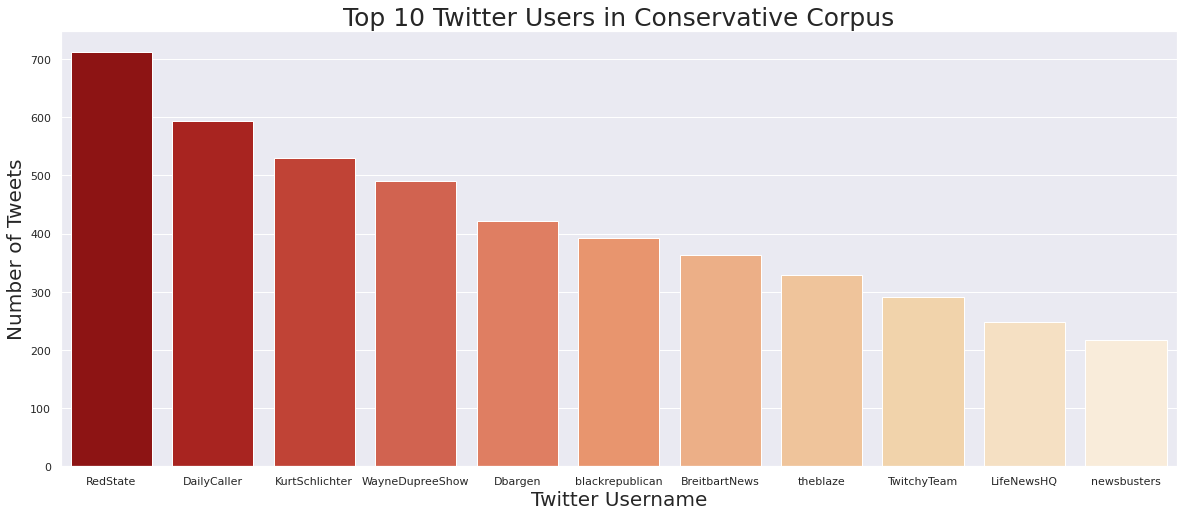

In [9]:
## plotting Top 10 conservative users
sns.set(rc={'figure.figsize':(20,8)})
sns.color_palette("OrRd")
ax = sns.barplot(x="username",y= "text", data=top_10,palette="OrRd_r")
ax.set_xlabel('Twitter Username',fontsize=20);
ax.set_ylabel('Number of Tweets',fontsize=20);
ax.set_title("Top 10 Twitter Users in Conservative Corpus", fontsize=25)
plt.show();

In [10]:
## finding top 10 liberal users
lib_users=pd.DataFrame(lib_data.groupby('username').text.count())
top_10_lib=lib_users.sort_values('text', ascending=False)[0:11]
top_10_lib=top_10_lib.reset_index()

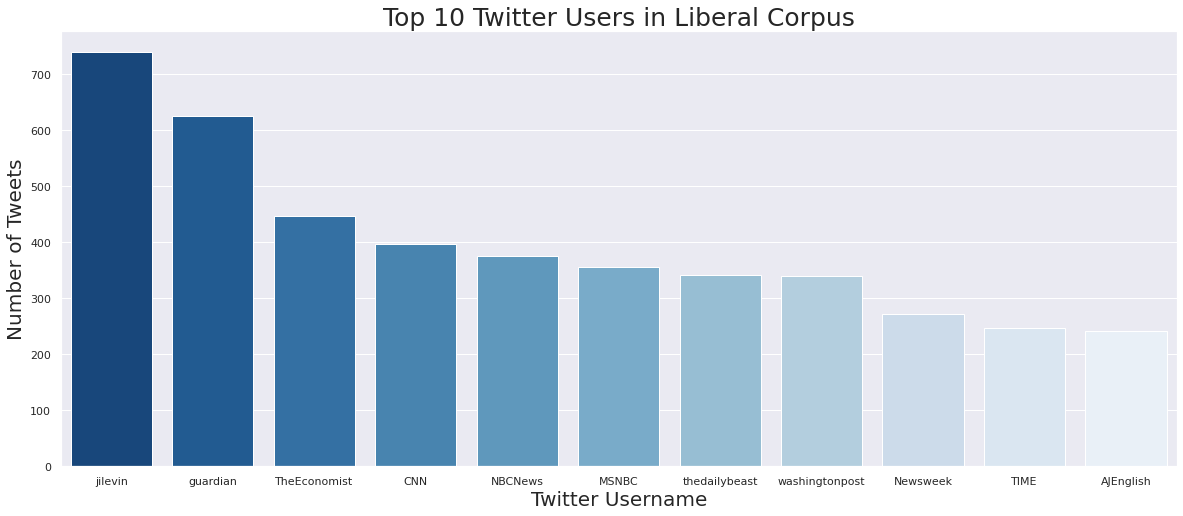

In [11]:
##plotting top 10 conservative users
sns.set(rc={'figure.figsize':(20,8)})
sns.color_palette("OrRd")
ax = sns.barplot(x="username",y= "text", data=top_10_lib,palette="Blues_r")
ax.set_xlabel('Twitter Username',fontsize=20);
ax.set_ylabel('Number of Tweets',fontsize=20);
ax.set_title("Top 10 Twitter Users in Liberal Corpus", fontsize=25)
plt.show();

### <center> Top 10 Users, Observations </center>

* The top 10 graphs help to depict exactly how many tweets the most prominent users have in the corpora.

* For the conservative graph, @RedState and the @Daily Caller are some of the most frequent conservative users in this corpus

* For the liberal graph, the user @jilevin and @guardian are some of the most frequent liberal tweeters in this corpus

## <center> Data Over Time </center>

* Below I have created a bar graph which depicts the amount of tweets per week from March 2020-March 2021 for each corpora.
* Here we can begin to see which months/time periods I have more and less data from for each corpora
* Overall, this is a good sanity check just to ensure that there is a fairly equal number of tweets over time from each corpus since they were randomly sampled

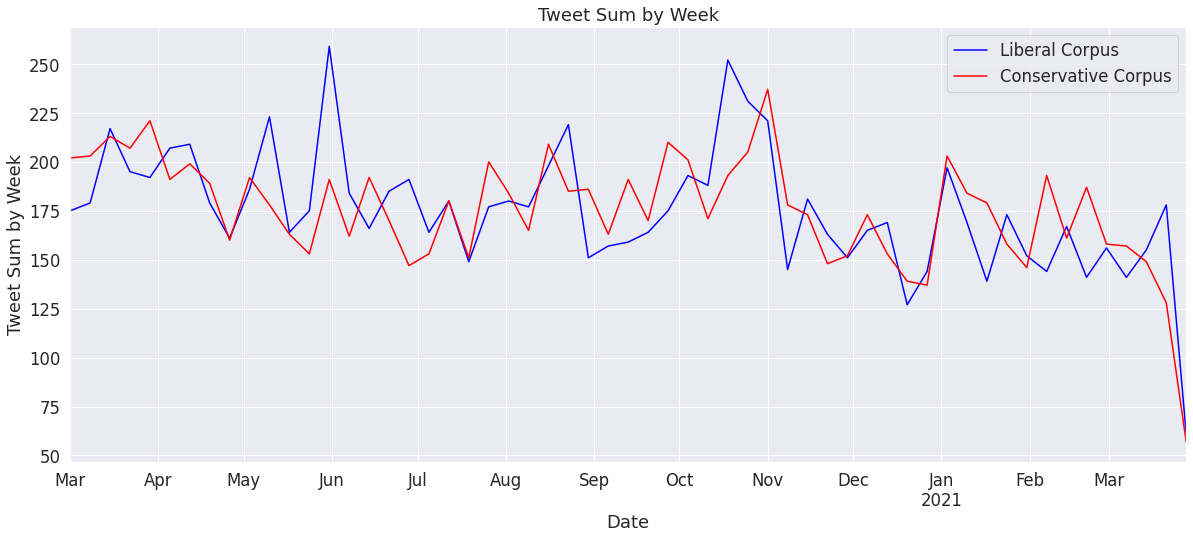

<Figure size 288x72 with 0 Axes>

In [25]:
## plotting data-time information for both liberals and conservatives
sns.set(font_scale =1.5)
con_data_2.resample('7D')["text"].sum().plot(label="Liberal Corpus", color="blue")
lib_data_2.resample('7D')["text"].sum().plot(label="Conservative Corpus", color="red")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Tweet Sum by Week")
plt.title("Tweet Sum by Week")
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plt.show()


### <center> Tweets Sums Graph: Observations </center>

* The above graph gives a sanity check that the approximately the same amount of data is in both corpora over the course of the year.

* There are some interesting peaks, however.

    * For example, there is more Liberal data around June and a between October and November.

    * For the conservative data, the peaks largely follow the same pattern for the liberal corpus. 
    * However, there are some distinct peaks around February and March 2021, where the liberal corpus dips.
    
* Next, I will narrow in on the days which are responsible for these peaks and valleys, what I will be referring to as polarization days, to get a greater understanding of what we can attribute these peaks and valleys to

### <center> Which Tweets Are Responsible for Greatest Polarization Between Conservatives and Liberals? </center>

* From the graph above, I will focusing in on the differences between tweets which are the greatest between the corpora and which days those tweets come from

* I will collect the tweets from those days

* I will be describes those tweets and any observations I notice which contribute to this polarization

In [13]:
# 1. get the weekly sums for con and lib
con_3 = con_data_2.resample('7D')["text"].sum().reset_index()
lib_3 = lib_data_2.resample('7D')["text"].sum().reset_index()

# 2. join the two time-series on date
merged = lib_3.merge(con_3,on='created_at')

# 3. calculate diff score (absolute value of lib - con)
merged['diff'] = np.abs(merged['text_x'] - merged['text_y'])

# 4. sort by diff and take top 10
merged.sort_values(by='diff',ascending=False).head(10)

,created_at,text_x,text_y,diff
13,2020-05-31,191,259,68
33,2020-10-18,193,252,59
55,2021-03-21,128,178,50
49,2021-02-07,193,144,49
51,2021-02-21,187,141,46
10,2020-05-10,178,223,45
17,2020-06-28,147,191,44
46,2021-01-17,179,139,40
30,2020-09-27,210,175,35
26,2020-08-30,186,151,35


### The top 3 polarization days are: 5/31/2020, 10/18/2020, 3/21/2021

### <center> Polarization Day 1: May 31st, 2020<center/>

In [14]:
##create a date column in my data sets, which is just the date of each tweet not the time
con_data['date'] = pd.to_datetime(con_data['created_at']).dt.date
lib_data['date'] = pd.to_datetime(lib_data['created_at']).dt.date

## using May 31st, find the tweets from this day in both corpora
may_31_lib=lib_data[pd.to_datetime(lib_data['date'])=="2020-05-31"]
may_31_con=con_data[pd.to_datetime(con_data['date'])=="2020-05-31"]

In [15]:
## print the revelant users
print("May 31st Liberal Users are:", may_31_lib["username"].unique())
print("May 31st Conservatives Users are:", may_31_con["username"].unique())

May 31st Liberal Users are: ['thedailybeast' 'PolitiFact' 'washingtonpost' 'jilevin' 'MSNBC'
 'Newsweek' 'EJDionne' 'TIME' 'crooksandliars' 'guardian' 'AnnCurry'
 'jeremyscahill']
May 31st Conservatives Users are: ['BreitbartNews' 'CaptYonah' 'HeyTammyBruce' 'ByronYork' 'KurtSchlichter'
 'BluegrassPundit' 'AppSame' 'theblaze' 'irritatedwoman' 'LifeNewsHQ'
 'WayneDupreeShow' 'TwitchyTeam' 'blackrepublican' 'newsbusters'
 'RedState' 'DailyCaller' 'stephenkruiser' 'ForAmerica' 'JudicialWatch']


In [16]:
## print the tweets for the conservative data set
may_31_con=may_31_con.reset_index()
may_31_con_text=[]
for i in range(0,may_31_con.shape[0]):
    may_31_con_text.append(may_31_con.loc[i, "text"])
may_31_con_text

['Luxury fashion stores are getting wiped out of their merchandise in a matter of seconds due to looting and rioting across various American cities. https://t.co/XGSdYoqPUj',
 'The takeaway was that these groups spent a lot of time organizing and it apparently coordinated in many major cities. Must be nice to commit shocking acts of violence and have the media parrot some conspiracy theory that teh Nazis did it.',
 'Yep. Perfect examples of ‘white supremacists’ and Trump supporters. The only thing missing is the #maga hat 🙄😒 https://t.co/uzxL4vbsma',
 "From Joe Biden, early this morning. Carefully worded statement with minimal criticism of violence, rioting. (They are not 'right and necessary.') In future, if needed, he'll be able to say he condemned violence. https://t.co/kWZ4z07bEE",
 'Perhaps you should go to your progressive friends who did it and complain to the manager. https://t.co/4Zki5gulEH',
 '@RealBasedMAGA @enoughalready16 @chicagosmayor You mean the cops who cited church g

In [17]:
## print the relevant tweets for liberal corpus
may_31_lib=may_31_lib.reset_index()
may_31_lib_text=[]
for i in range(0,may_31_lib.shape[0]):
    may_31_lib_text.append(may_31_lib.loc[i, "text"])
may_31_lib_text

['.@mtomasky: "Instead of tying himself to a national movement, gubernatorial hopeful Stephen Smith has taken a relentlessly local approach—and it looks like it’s working" https://t.co/MZSK0mv2ei',
 'President Trump said “Twitter is completely stifling FREE SPEECH” after the platform slapped a fact-check label on one of his misleading tweets. That’s Pants on Fire! https://t.co/0n4LISHCDZ #TwitterFactCheck https://t.co/GBPZzZ8fyd',
 'Trump’s May days: A month of distractions and grievances as nation marks bleak coronavirus milestone https://t.co/4QsUwHsxEB',
 'Police cars burn as violence mars National Day of Protest: George Floyd protests live updates https://t.co/zLBFg3Z191 https://t.co/GZJF9fXAEH',
 'When asked about Rep. Clyburn saying this is "very tough timing" for her chance to be selected as Joe Biden\'s running mate in 2020, Sen. Klobuchar says she "can\'t discuss politics right now, my city was on fire last night."\n\nhttps://t.co/vJRXG8ZD3D',
 'Arizona governor implementing s

### <center> Observations from May 31st </center>

* As these tweets show, May 31st was a tumultuous and polarizing day. Amidst the protests following the death of George Floyd, tweets from May 31st are riddled with partisan-specific language.

* These tweets are polarizing. The conservative corpus discusses the damage done to stores and local businesses from the protests and specifically uses the word "looting" to describe the events that occurred on these days. Some tweets even refer to these events as "the Antifa insurrection".

* For the liberal corpus, there is more discussion of "peaceful protests" as opposed to rioting and "looting". This corpus highlights police brutality.

* May 31st is a really fascinating look into the polarization in this country right now over police brutality and race relations.

### <center> Polarization Day 2: October 18th, 2020<center/>

In [18]:
## create dataframes based on this date
oct_18_lib=lib_data[pd.to_datetime(lib_data['date'])=="2020-10-18"]
oct_18_con=con_data[pd.to_datetime(con_data['date'])=="2020-10-18"]

In [19]:
## print out relevant users in these dataframes
print("Oct 18th Liberal Users are:", oct_18_lib["username"].unique())
print("Oct 18th Conservatives Users are:", oct_18_con["username"].unique())

Oct 18th Liberal Users are: ['TheEconomist' 'NBCNews' 'cnnbrk' 'chrislhayes' 'AJEnglish'
 'politicususa' 'MoveOn' 'TPM' 'jilevin' 'guardian' 'MarkRuffalo'
 'washingtonpost' 'rcooley123' 'BetteMidler']
Oct 18th Conservatives Users are: ['RealJamesWoods' 'IndyEnigma' 'RedState' 'TheBubbleBubble'
 'KurtSchlichter' 'JudicialWatch' 'AppSame' 'AHMalcolm' 'marklevinshow'
 'Moonbattery1' 'iSheeple1' 'BlueWaterDays' 'DailyCaller' 'HeyTammyBruce'
 'Dbargen' 'GeneMcVay' 'mikandynothem']


In [20]:
## display the conservative corpus data
oct_18_con=oct_18_con.reset_index()
oct_18_con_text=[]
for i in range(0,oct_18_con.shape[0]):
    oct_18_con_text.append(oct_18_con.loc[i, "text"])
oct_18_con_text

['Hey, did you happen to hear about the Women’s March Superspreader Event? https://t.co/ZwgHYLxpNV',
 "Joe's Teleprompter #ccot #dems #gop #libcrib #lnyhbt #maga #msm #ofa #p2 #resist #tcot #tlot #uniteblue https://t.co/i7Xx2bByK8",
 'Wagtoon: Trust in the Lord \n https://t.co/NzQqphwYLl',
 "@BobDobb41589309 Absolutely - that's what I've been experiencing.",
 'No man wants them and that is why they are sad. https://t.co/FVkfHbi9FP',
 '.@TomFitton’s explosive new book, A Republic Under Assault, alerts the American people about the Left’s dangerous attack on our freedoms! Preorder your copy today: https://t.co/Qfmqcim7El https://t.co/TKFzq3RUUI',
 'Sturgis\nA motorcycle rally may have caused a COVID-19 outbreak in the Upper Midwest, according to The Washington Post\n\nAccording to the @washingtonpost is like saying according to Pravda',
 'They are magical. Moving. And crackling.',
 '1. Since the president is speaking in Nevada, and Fox is covering it Live (which is very important),\xa0 m

In [21]:
## display the liberal corpus data
oct_18_lib=oct_18_lib.reset_index()
oct_18_lib_text=[]
for i in range(0,oct_18_lib.shape[0]):
    oct_18_lib_text.append(oct_18_lib.loc[i, "text"])
oct_18_lib_text

['New Zealand First, a populist party, has been booted from parliament https://t.co/3RhZpLiyvK',
 'Domestic violence homicides are on the rise in many cities around the country, according to preliminary data from local law enforcement. https://t.co/Tf8R8koFYi',
 "A hiker missing in Utah's Zion National Park for nearly two weeks has been found alive, her family says\nhttps://t.co/YAjeOnb1l3",
 'A great argument against the electoral college! None of these people’s votes will really matter. https://t.co/qkmhAM4f0l',
 '13-year conventional arms embargo on Iran expires despite US opposition https://t.co/XgyCMJoh6b https://t.co/k1rtuKbpp4',
 'Joe Biden hammered Senate Republicans at his drive up North Carolina rally and made the argument that leave Mitch McConnell unemployed.\n\nhttps://t.co/FtSCPVg2OU via @politicususa',
 'What are you doing to take care of yourself? \nHow will you remind your loved ones to do the same?\n\n#TogetherWeMakeTheFuture https://t.co/9B3GiXdGjF',
 'Lara Trump Ins

### <center> Observations from October 18th </center>

* As we near the election, conversation starts to get particularly divisive.

* A notable element in the conservative corpus, is that there is a lot of negative sentiment towards Joe Biden (particularly references to Hunter Biden)

* The liberal corpus is more positive. There is positive conversation around Joe Biden and negative references to people like Amy Coney Barrett, who was being confirmed in the Supreme Court around this time.


### <center> Polarization Day 3: March 21st, 2021 <center/>

In [28]:
## create dataframe for march 21st tweets
march_21_lib=lib_data[pd.to_datetime(lib_data['date'])=="2021-03-21"]
march_21_con=con_data[pd.to_datetime(con_data['date'])=="2021-03-21"]
print("May 31st Liberal Users are:", march_21_lib["username"].unique())
print("May 31st Conservatives Users are:", march_21_con["username"].unique())

May 31st Liberal Users are: ['TheAtlantic' 'NBCNews' 'TheOnion' 'cher' 'AP' 'BuzzFeed' 'GeorgeTakei'
 'CapehartJ' 'MotherJones' 'TheEconomist' 'guardian' 'rcooley123'
 'jilevin' 'dscc']
May 31st Conservatives Users are: ['WayneDupreeShow' 'BossHoggUSMC' 'AppSame' 'KurtSchlichter' 'LifeNewsHQ'
 'BreitbartNews' 'BluegrassPundit' 'irritatedwoman' 'DanaPerino' 'secupp'
 'ChasD3']


In [29]:
## print out data frame for march 21st for conservatives
march_21_con=march_21_con.reset_index()
march_21_con_text=[]
for i in range(0,march_21_con.shape[0]):
    march_21_con_text.append(march_21_con.loc[i, "text"])
march_21_con_text

['These will be the most powerful 2 images you see today. Guaranteed. They sum it all up.\n \nhttps://t.co/py6fNpVI2U',
 '@fvckcommies But Antifa chased his undercover cam dude away',
 "Hi I'm @NYGovCuomo I killed 16,000 I sexually harassed 8 you know about, I'm a Democrat who won an Emmy so I'm good",
 'Noem’s next move is to call all the conservatives on Gab anti-Semites and then jet off to Cancun. 🤷🏻\u200d♂️',
 'Liberals want to ban guns, but not abortions. Buying a gun does not kill anyone, an abortion always does.',
 'Total hypocrite phony https://t.co/FUVna8hfmw',
 '🍆🍆🍆🍆 https://t.co/pwnwlBGPER',
 "@govkristinoem Just sign the bill.  Running your mouth won't help.",
 '@dentrev1 @SaysSimonson @Cignaquestions You win!',
 '@sonnyguar Carhartt',
 'Thanks. Good resource 👇🏻 https://t.co/qg1YYLxdII',
 '@Vuhtans 1. 2020 Biden victory\n\n2. Covid 19 lockdowns\n\n3. Trump Russia Hoax\n\n(All DEMOCRAT driven!!!)']

In [31]:
## print out data frame for march 21st for liberals
march_21_lib=march_21_lib.reset_index()
march_21_lib_text=[]
for i in range(0,march_21_lib.shape[0]):
    march_21_lib_text.append(march_21_lib.loc[i, "text"])
march_21_lib_text

['The new HBO series about QAnon is a rollicking game, @sophieGG writes. Missing is a sense of what the conspiracy theory has cost us. https://t.co/tMKtcU668v',
 "Celebrity evangelical Bible teacher Beth Moore's split with the Southern Baptist Convention is the latest in a string of departures that underscore issues of gender, race and political division within the denomination, some former and current members say. https://t.co/ITfBPAAWIh",
 'Mom Moves In For Kill After Spotting Child’s Shirt Tag Sticking Out https://t.co/vCIODYl24W https://t.co/ehbiA2dYOe',
 '@Cherfan4ever1 @primo2009 I try,but So Many🐥🐣',
 'Miami Beach officials have extended an 8 p.m. curfew for at least another week. The decision followed over 1,000 arrests as unruly spring breakers gathered by the thousands, fought in the streets, destroyed restaurant property and refused to wear masks. https://t.co/texCxkDkpf',
 "3 things you might have missed from Elliot Page's first interview since coming out as trans #TheBuzz 

### <center> Observations from March 21st </center>

* March 21st, 2021 does not provide any particularly striking patterns or differences.

* However, it is interesting to note in the conservative corpus there is some reference to abortion and gun control in a negative, and traditionally "conservative" manner.

* In the liberal corpus there is a greater quantity of tweets on this day which might be driving the difference in sentiment.

# <center> Description of My Corpora: Conclusion </center>

<center> <img src="images/political_polarization.png" width="400" height="400"> </center>

* Political Polarization is prominent in late Spring (May 2020), Fall (October 2020), and even in Spring 2021 ( March) (which is a lot of the time!!)

* Corpora diverge on topics related to the election and the murder of George Floyd and the protests which followed.